In [30]:
# imports
import pandas as pd
import seaborn as sns

# importing imbd dataset
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")

# df with column color 
color_or_bw = imdb.query("color in ['Color', ' Black and White']")

# Transforming color = 1 and black and white = 0
color_or_bw["color_0_or_1"] = (color_or_bw["color"]=="Color") * 1

budget_gross=  imdb[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

# Droping duplicates values in dataset
imdb = imdb.drop_duplicates()

# Getting all americans movies and sorting for budget
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


## Challenge 0

See the brazilian movies that has the most *budget*

In [31]:
# Show all countries in dataset
imdb["country"].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [32]:
brazilMovies = imdb.query("country == 'Brazil'")
brazilMovies.sort_values('budget', ascending=False)['movie_title']

3976        House of Sand 
3553          Elite Squad 
3953         Futuro Beach 
4499    The Second Mother 
4029          City of God 
4131            Open Road 
4144      Central Station 
4986             Gabriela 
Name: movie_title, dtype: object

## Challenge 1

Ploting the mean boxplot ( imdb_score ) of black and white movies and colors movies.


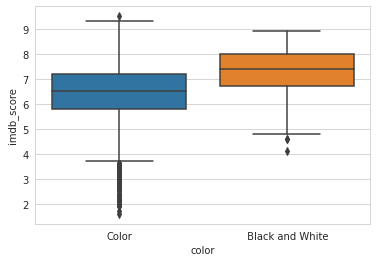

In [33]:
sns.boxplot(data=color_or_bw, x="color", y='imdb_score')

**Analysis**: With this result we can see that the median of means of balck and withe movies is bigger than the colored movies in sample. We can also see that are many movies outliners in color movies, better or worse than mean. 

## Challenge 2

In the graphic **budget x profit** there's a point with a lot of budget and loss. What's this movie ? ( budget close to 2.5 )


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


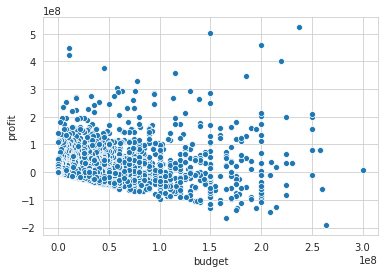

In [34]:
# Graphic budget x profit
imdb_usa['profit'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "profit"]].dropna()

sns.scatterplot(x="budget", y="profit", data = budget_gross)

In [35]:
worst_movie = imdb_usa.sort_values('profit', ascending=True)[['movie_title','profit', 'title_year']].head(1)
worst_movie

,movie_title,profit,title_year
5,John Carter,-190641321.0,2012.0


## Challenge 3

Can recent movies have a loss beacuse they didn't have time to recover their investment ?

In [36]:
# Getting the latest movies released, if their budget and gross are bigger than 0

latest_movies_released = imdb_usa.query('budget > 0 and gross > 0').sort_values('title_year', ascending=False).head(20)[['movie_title', 'profit', 'title_year']]
latest_movies_released

,movie_title,profit,title_year
163,Gods of Egypt,-108858926.0,2016.0
2549,The Young Messiah,-12037424.0,2016.0
2404,My Big Fat Greek Wedding 2,41573085.0,2016.0
244,The Huntsman: Winter's War,-67047980.0,2016.0
1742,The Boss,34034755.0,2016.0
73,Suicide Squad,-13912817.0,2016.0
150,Ghostbusters,-25900341.0,2016.0
154,Kung Fu Panda 3,-1476537.0,2016.0
65,X-Men: Apocalypse,-23014913.0,2016.0
567,The Angry Birds Movie,34225164.0,2016.0


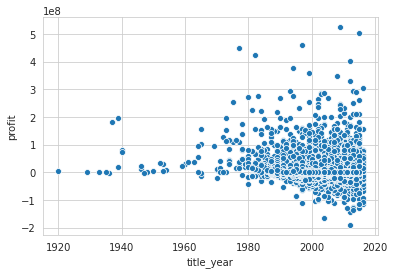

In [37]:
profit_per_year = imdb_usa[["title_year", "profit"]].dropna()

# plotting a GRaph for compare
sns.scatterplot(x="title_year", y="profit", data=profit_per_year)

## Challenge 4

What are the movies in pre-WW2 that made a lot of profit.

In [38]:
## ww2 (1939-1945).
imdb_usa = imdb_usa.dropna()
imdb_usa.query('title_year == 1940 | title_year == 1939').sort_values('profit', ascending=False)[['profit','movie_title', 'title_year']]



,profit,movie_title,title_year
3970,194678278.0,Gone with the Wind,1939.0
1143,81700000.0,Pinocchio,1940.0
4157,19402612.0,The Wizard of Oz,1939.0


## Challenge 5

In **movies_same_director x profit** graphic, is Woody Allen between values 15 and 20 ?


In [39]:
movies_by_director = imdb_usa["director_name"].value_counts()

gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(movies_by_director, on="director_name")
gross_director.columns=["profit", "movies_same_director"]

gross_director = gross_director.reset_index()
gross_director

,director_name,profit,movies_same_director
0,James Cameron,760505847.0,6
1,Gore Verbinski,309404152.0,7
2,Christopher Nolan,448130642.0,8
3,Andrew Stanton,73058679.0,3
4,Sam Raimi,336530303.0,10
...,...,...,...
2956,Richard Linklater,1227508.0,10
2957,John Waters,180483.0,2
2958,Shane Carruth,424760.0,1
2959,Robert Rodriguez,2040920.0,12


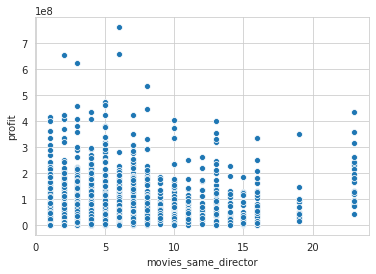

In [40]:
sns.scatterplot(x="movies_same_director", y="profit", data = gross_director)

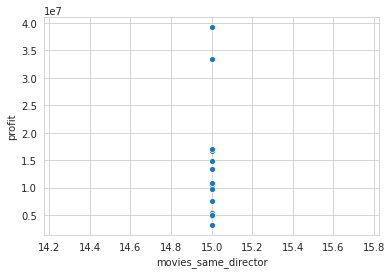

In [41]:
gross_director = gross_director.dropna()

woody_allen_gross = gross_director.query("director_name=='Woody Allen'");

sns.scatterplot(x="movies_same_director", y="profit", data = woody_allen_gross)

# So the movies are by Woody Allen

## Challenge 7

Analyses the pairplot

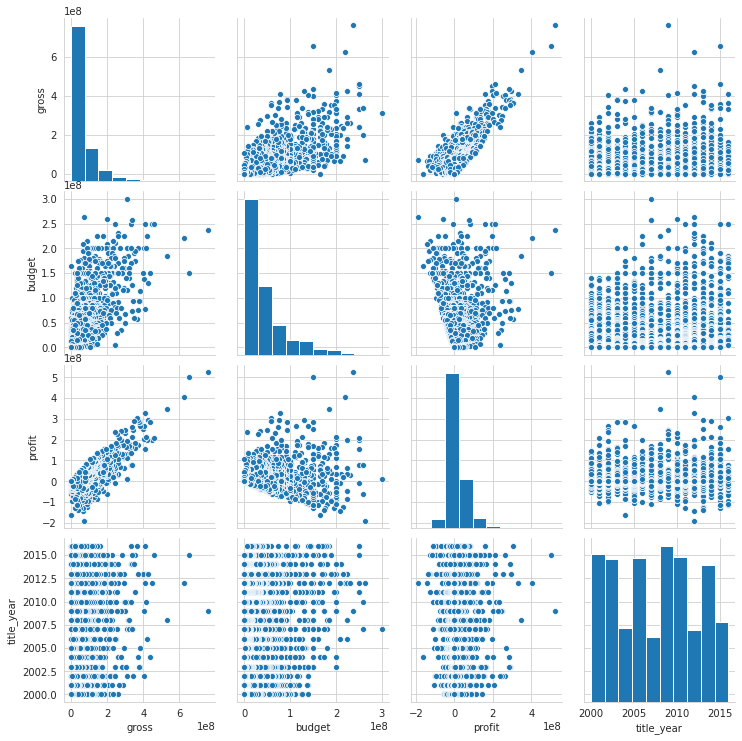

In [42]:
sns.pairplot(data = imdb_usa.query('title_year >= 2000')[["gross", "budget", "profit", "title_year"]])

In [43]:
movies_after_2000 = imdb_usa.query('title_year >= 2000')
# Getting correlation from movies after year 2000
movies_after_2000[["gross", "budget", "profit", "title_year"]].corr()

,gross,budget,profit,title_year
gross,1.000000,0.703718,0.772080,0.122418
budget,0.703718,1.000000,0.091799,0.148680
profit,0.772080,0.091799,1.000000,0.038580
title_year,0.122418,0.148680,0.038580,1.000000


## Challenge 7

Calculate the correaltion of post-2000 movies only. 

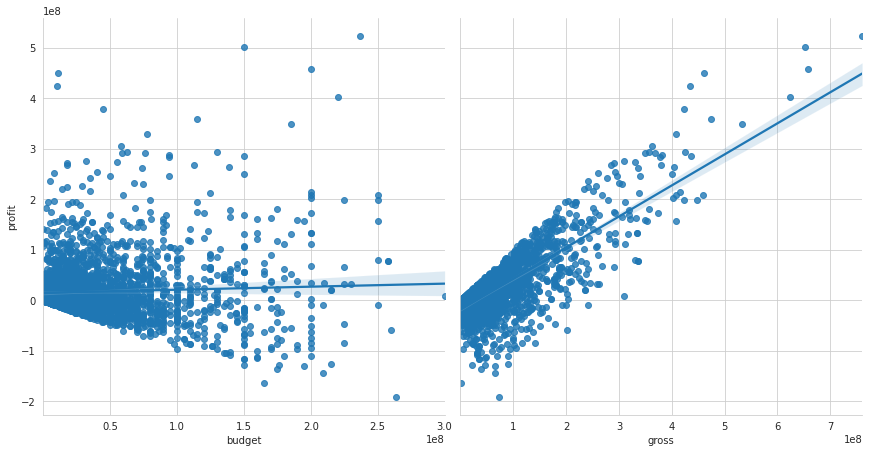

In [44]:
sns.pairplot(imdb_usa, y_vars='profit', x_vars=['budget', 'gross'], height=6, kind='reg')

## Desafio 8 do [Allan Spadini](https://twitter.com/allanspadini)

Find the line in graphic **gross x profit** with movies after 2000.

<Figure size 1152x576 with 0 Axes>

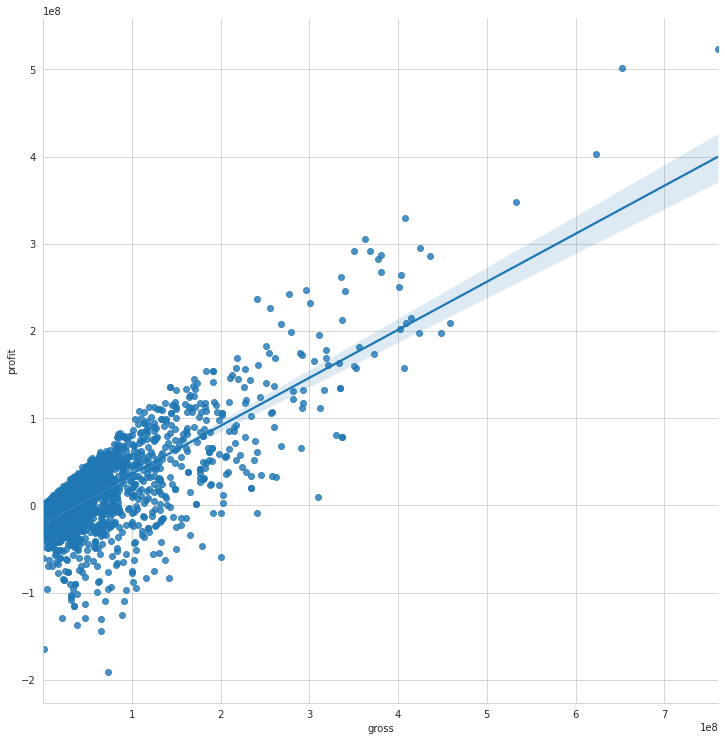

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
sns.pairplot(x_vars="gross", y_vars="profit", data = imdb_usa.query('title_year >= 2000'), kind='reg', height=10)
